Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
X_tilda = poly.fit_transform(X)

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
w = linalg.inv(X_tilda.T.dot(X_tilda)).dot(X_tilda.T).dot(y)
print(w)
w1 = linalg.pinv(X_tilda).dot(y)
print(w1)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
h = w.dot(X_tilda.T)
ehd = 1/2 * np.sum(np.square(y - h))
mse = mean_squared_error(y, h)
print(ehd)
print(mse)
print('Funkcija srednje kvadratne pogreške je realnija jer gleda prosječan gubitak po primjerim')

4.085714285714285
2.0428571428571427
Funkcija srednje kvadratne pogreške je realnija jer gleda prosječan gubitak po primjerim


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
    w = linalg.inv(X_tilda).dot(y)
except LinAlgError as e:
    print('LinAlgError: {}'.format(e))
    print('X nije kvadratna matrica')

square_matrix =  np.array([[0, 2, -1],[3, -2, 1],[3, 2, -1]])

try:
    w = linalg.inv(square_matrix).dot(y)
except LinAlgError as e:
    print('LinAlgError: {}'.format(e))
    print('Matrica je singularna')

LinAlgError: Last 2 dimensions of the array must be square
X nije kvadratna matrica
LinAlgError: Singular matrix
Matrica je singularna


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_tilda, y)
print(reg.intercept_, reg.coef_)

pred = reg.predict(X_tilda)
print(mean_squared_error(y, pred))

2.2 [0.         0.45714286]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return np.array([f(x_) + normal(0, noise, 1) for x_ in X])

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

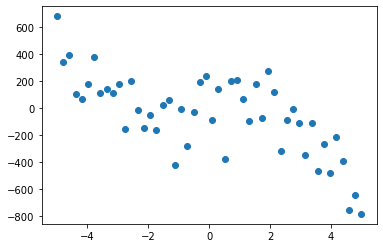

In [11]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [12]:
poly = PolynomialFeatures(2)
X_tilda = poly.fit_transform(X)
w = linalg.pinv(X_tilda).dot(y)
preds = w.T.dot(X_tilda.T)

print(mean_squared_error(y, preds.T))

43866.010554954


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

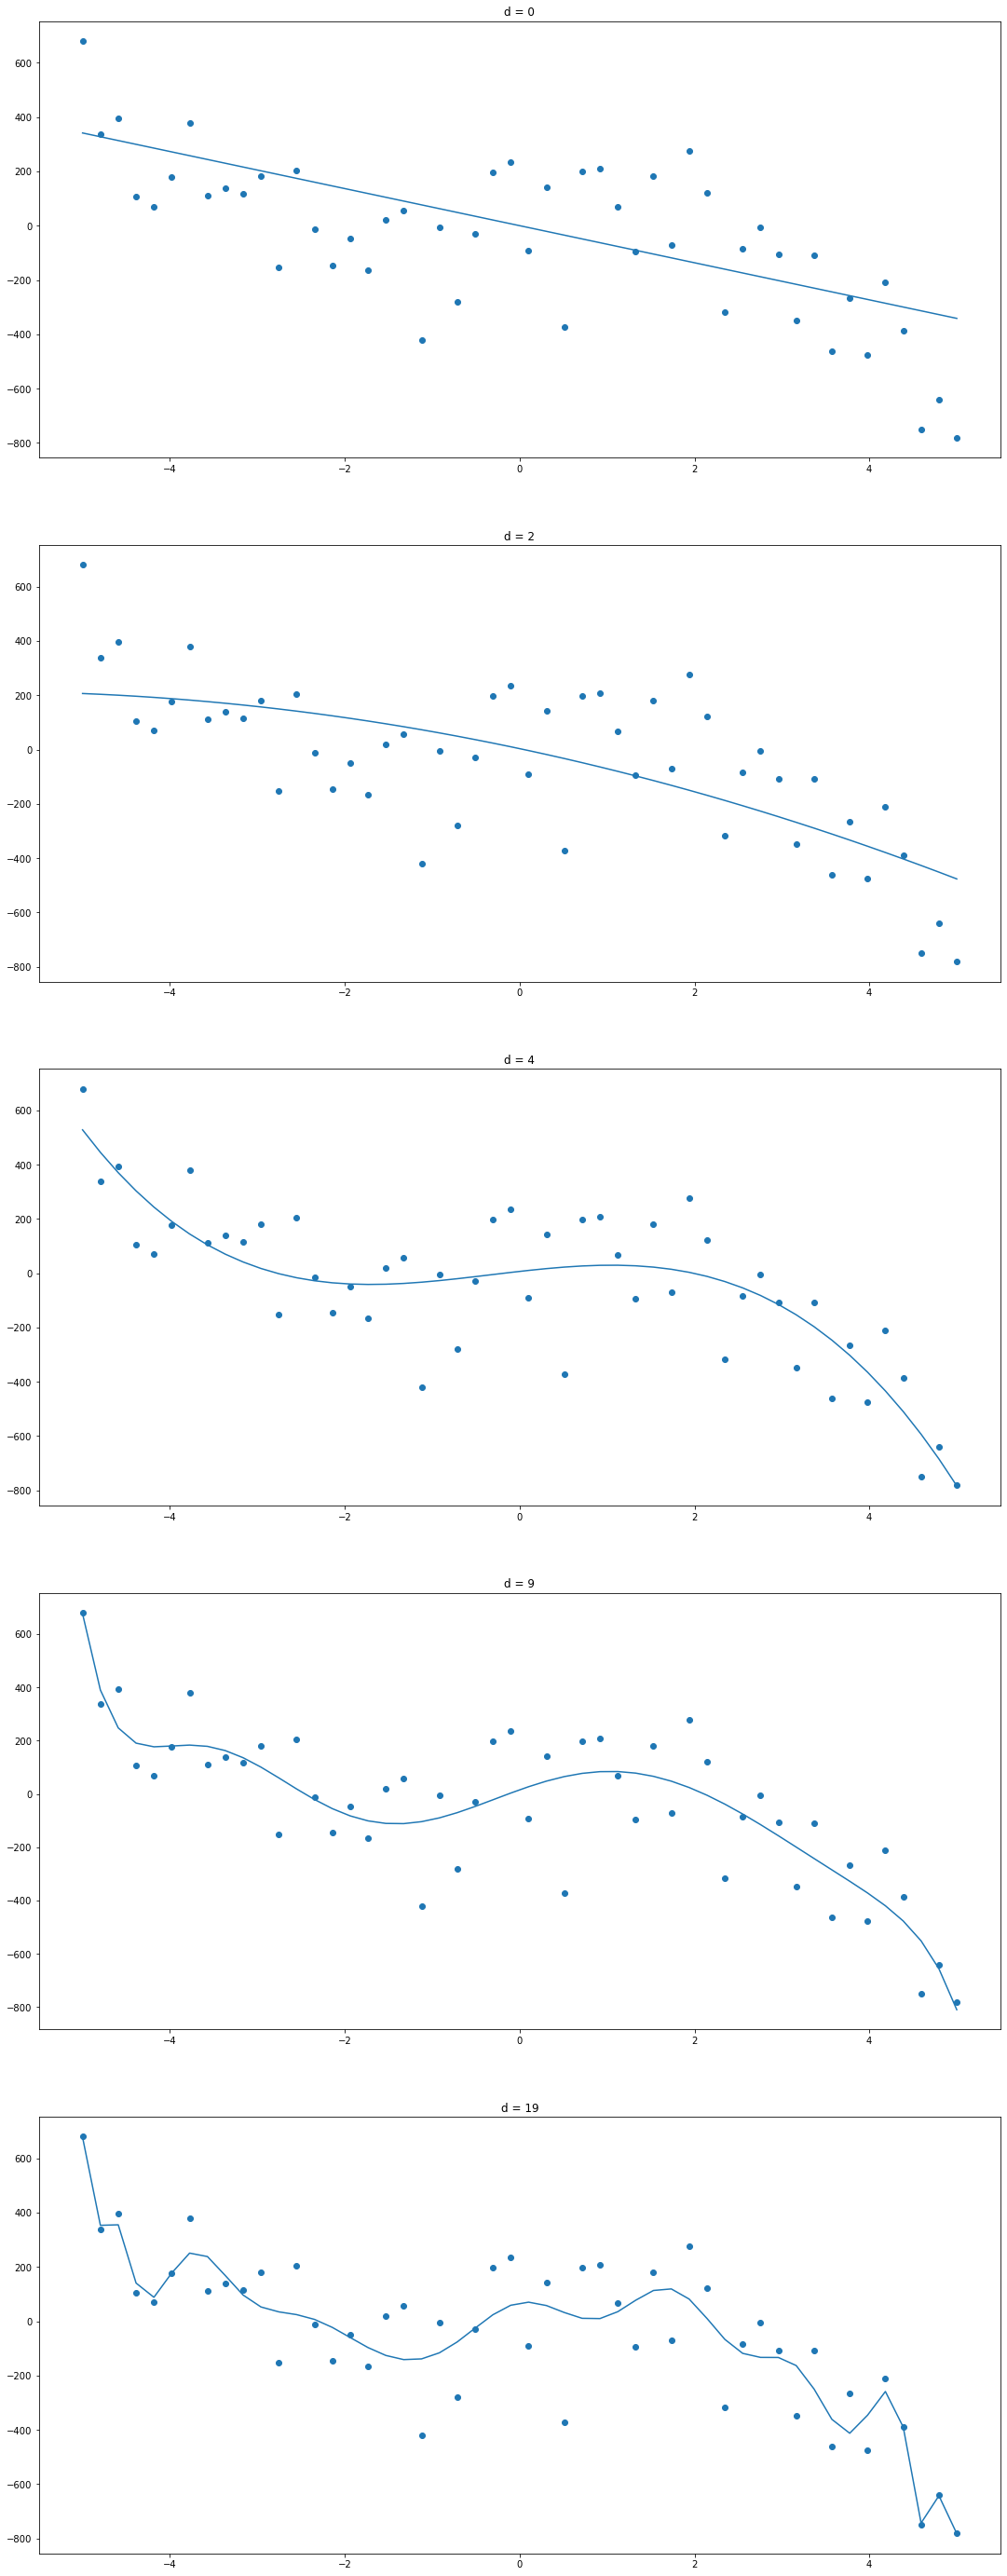

In [13]:
degrees = [0, 2, 4, 9, 19]
fig, axes = plt.subplots(5)
fig.set_size_inches(18.5, 50)
for i, d in enumerate(degrees):
    if d == 0:
        X_tilda = X
    else:
        poly = PolynomialFeatures(d)
        X_tilda = poly.fit_transform(X)
    w = linalg.pinv(X_tilda).dot(y)
    preds = w.T.dot(X_tilda.T)
    axes[i].set_title('d = {}'.format(d))
    axes[i].scatter(X, y)
    axes[i].plot(X, preds.flatten())
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

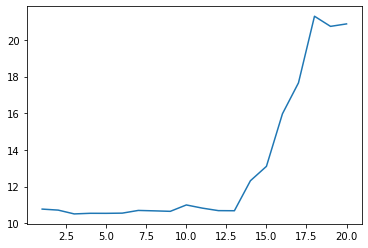

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, shuffle = True) 
degrees = range(1, 21)
losses = []

for d in degrees:
    poly = PolynomialFeatures(d)
    X_train_tilda = poly.fit_transform(X_train)
    X_test_tilda = poly.transform(X_test)
    w = linalg.pinv(X_train_tilda).dot(y_train)
    
    preds = w.T.dot(X_test_tilda.T)
    losses.append(np.log(mean_squared_error(y_test, preds.T)))


plt.plot(degrees, losses)
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

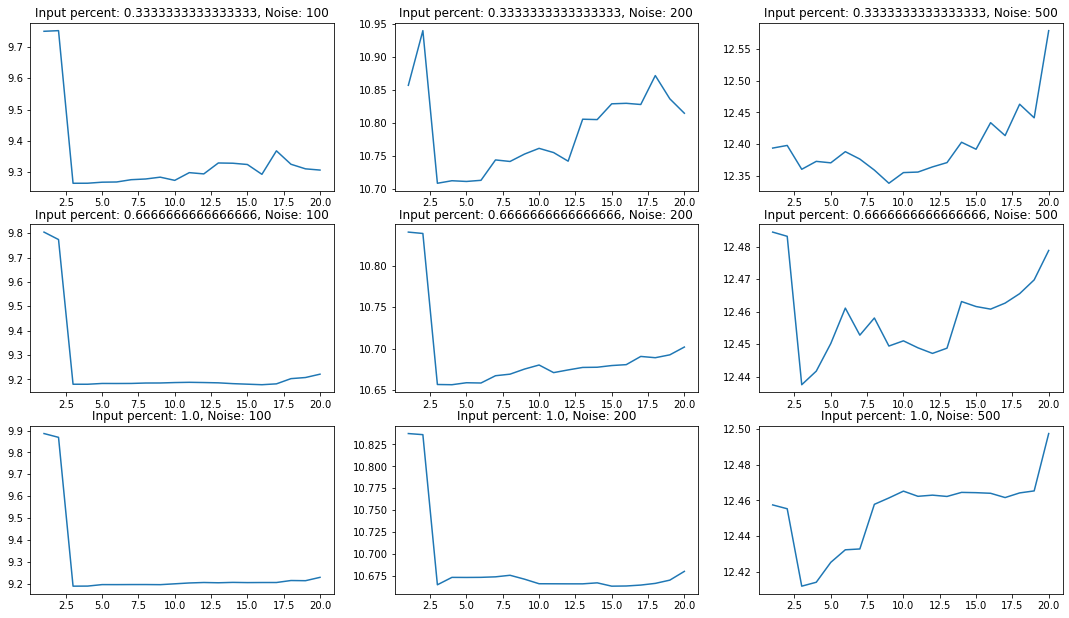

In [15]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size = .5)
noises = [100, 200, 500]
y_train = []
y_test = []
for noise in noises:
    y_train.append(make_labels(X_train, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, noise))
    y_test.append(make_labels(X_test, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, noise))

indexes = np.arange(len(X_train))
np.random.shuffle(indexes)
one_third_indexes = sorted(indexes[:round(len(X_train) / 3)])
two_third_indexes = sorted(indexes[:round(2 * len(X_train) / 3)])

X_train = [X_train[one_third_indexes], X_train[two_third_indexes], X_train]
X_test = [X_test[one_third_indexes], X_test[two_third_indexes], X_test]

for i in range(len(y_train)):
    y_train[i] = [y_train[i][one_third_indexes], y_train[i][two_third_indexes], y_train[i]]
    y_test[i] = [y_test[i][one_third_indexes], y_test[i][two_third_indexes], y_test[i]]

degrees = range(1, 21)

for i in range(len(X_train)):
    input_percent = (i + 1) / 3
    for j in range(len(y_train)):
        noise = noises[j]
        losses = []

        for d in degrees:
            poly = PolynomialFeatures(d)
            X_train_tilda = poly.fit_transform(X_train[i])
            X_test_tilda = poly.transform(X_test[i])
            w = linalg.pinv(X_train_tilda).dot(y_train[j][i])
            preds = w.T.dot(X_test_tilda.T)
            losses.append(np.log(mean_squared_error(y_test[j][i], preds.T)))

        axes[i][j].set_title('Input percent: {}, Noise: {}'.format(input_percent, noise))
        axes[i][j].plot(degrees, losses)
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [40]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(2)
X_tilda = poly.fit_transform(X)
for lamb in [0, 1, 10]:
    w = linalg.inv(X_tilda.T.dot(X_tilda) + lamb * np.eye(X_tilda.shape[1])).dot(X_tilda.T).dot(y)
    print(w)

[ 3.7  -2.65  0.75]
[ 1.70803718 -0.43575724  0.31000547]
[0.4192691  0.11328904 0.25415282]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge

for lamb in [0, 1, 10]:
    reg = Ridge(lamb)
    reg.fit(X_tilda, y)
    print(reg.intercept_, reg.coef_)

3.6999999999999997 [ 0.   -2.65  0.75]
2.764601769911504 [ 0.         -1.01769912  0.3840708 ]
2.2945454545454544 [ 0.         -0.13064935  0.17792208]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

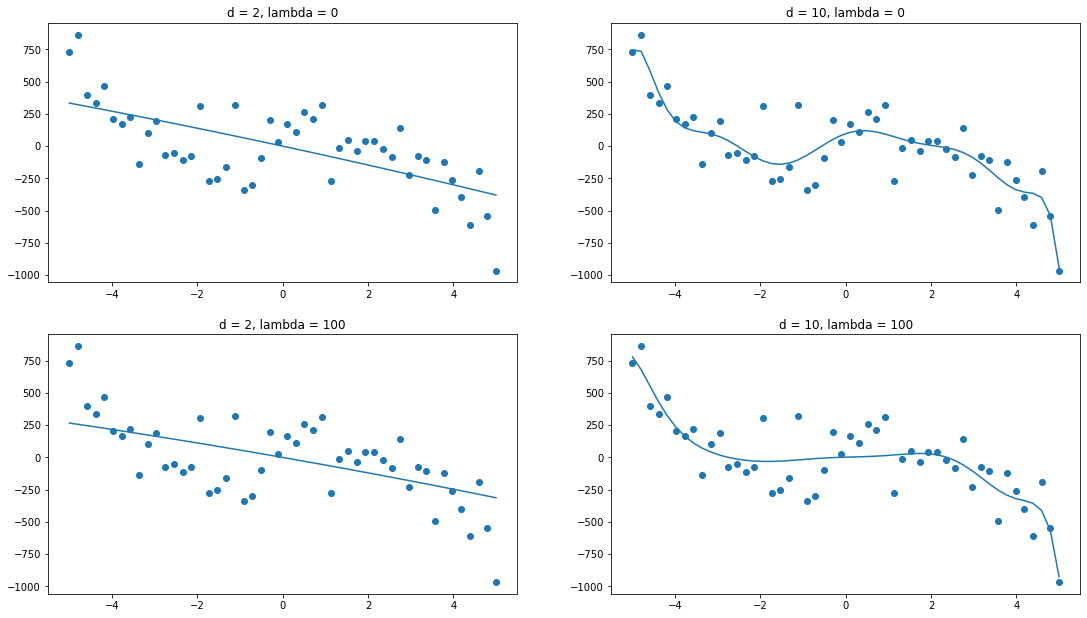

In [42]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, 200)
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for i, lamb in enumerate([0, 100]):
    for j, d in enumerate([2, 10]):
        poly = PolynomialFeatures(d)
        X_tilda = poly.fit_transform(X)
        w = linalg.inv(X_tilda.T.dot(X_tilda) + lamb * np.eye(X_tilda.shape[1])).dot(X_tilda.T).dot(y)
        preds = w.T.dot(X_tilda.T)
        axes[i][j].set_title('d = {}, lambda = {}'.format(d, lamb))
        axes[i][j].scatter(X, y)
        axes[i][j].plot(X, preds.T)

plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


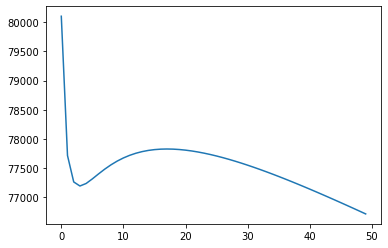

In [51]:
poly = PolynomialFeatures(10)
X_tilda = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tilda, y, test_size=.5)
losses = []
lambdas = range(50)
for lamb in lambdas:
    w = linalg.inv(X_train.T.dot(X_train) + lamb * np.eye(X_train.shape[1])).dot(X_train.T).dot(y_train)
    preds = w.T.dot(X_test.T)
    losses.append(mean_squared_error(y_test, preds.T))
plt.plot(lambdas, losses)
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [29]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

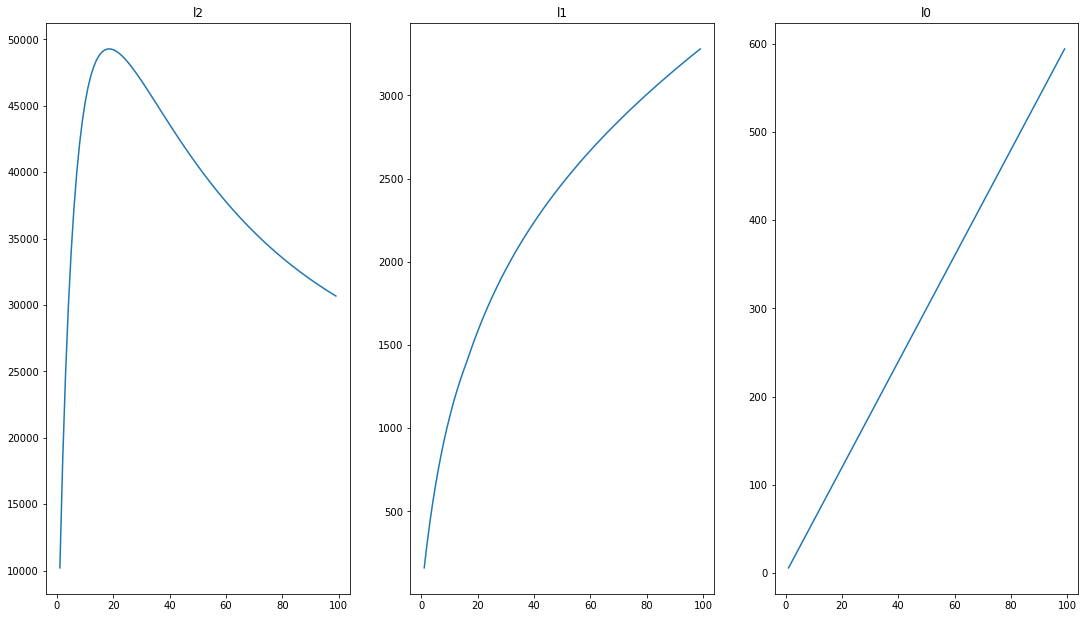

In [67]:
from sklearn.linear_model import Ridge
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, 200)

poly = PolynomialFeatures(5)
X_tilda = poly.fit_transform(X)

l2, l1, l0 = [], [], []

lambdas = range(1, 100)
for lamb in lambdas:
    w = linalg.inv(X_tilda.T.dot(X_tilda) + lamb * np.eye(X_tilda.shape[1])).dot(X_tilda.T).dot(y)
    l2.append(lamb * np.sum(np.square(w)))
    l1.append(lamb * np.sum(np.abs(w)))
    l0.append(lamb * nonzeroes(w))
    
axes[0].set_title('l2')
axes[0].plot(lambdas, l2)
axes[1].set_title('l1')
axes[1].plot(lambdas, l1)
axes[2].set_title('l0')
axes[2].plot(lambdas, l0)

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

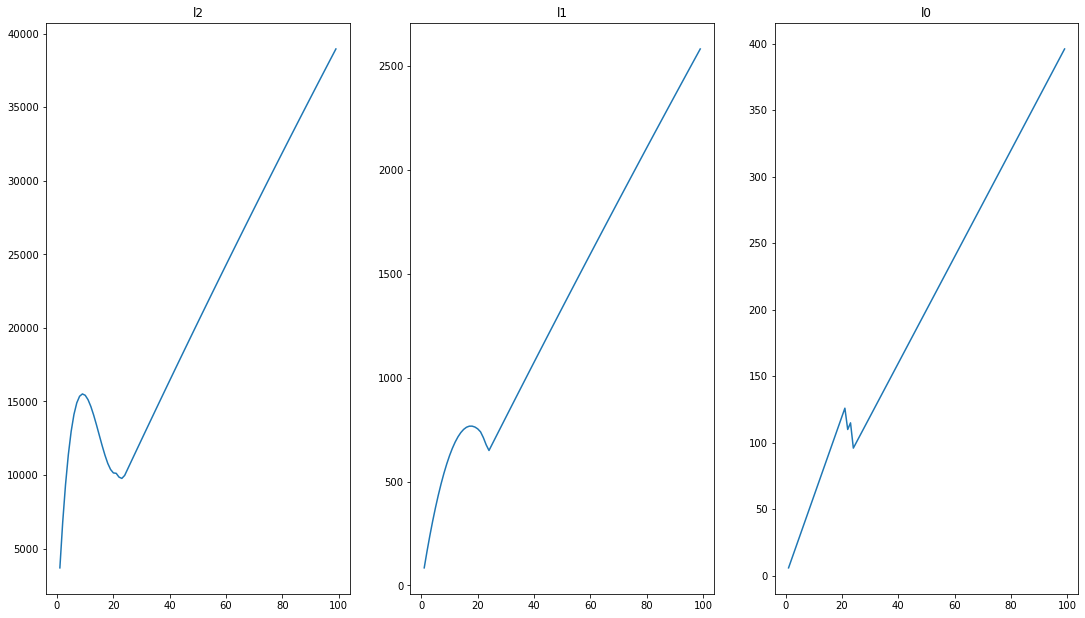

In [73]:
from sklearn.linear_model import Lasso
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * x ** 2 - 5 * x ** 3, 200)

poly = PolynomialFeatures(5)
X_tilda = poly.fit_transform(X)

l2, l1, l0 = [], [], []

lambdas = range(1, 100)
for lamb in lambdas:
    reg = Lasso(lamb)
    reg.fit(X_tilda, y)
    w = reg.coef_
    w[0] = reg.intercept_
    l2.append(lamb * np.sum(np.square(w)))
    l1.append(lamb * np.sum(np.abs(w)))
    l0.append(lamb * nonzeroes(w))
    
axes[0].set_title('l2')
axes[0].plot(lambdas, l2)
axes[1].set_title('l1')
axes[1].plot(lambdas, l1)
axes[2].set_title('l0')
axes[2].plot(lambdas, l0)

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [74]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

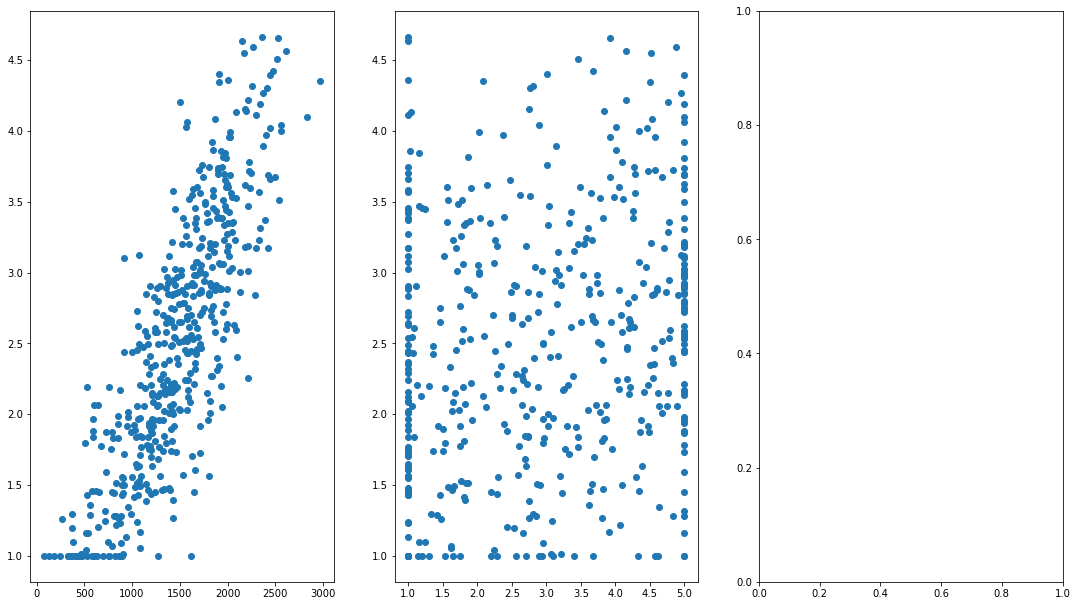

In [80]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

axes[0].scatter(grades_X[:,0], grades_y)
axes[1].scatter(grades_X[:,1], grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [105]:
reg = Ridge(0.01)
reg.fit(grades_X, grades_y)
print(reg.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = np.append(grades_X, grades_y.reshape(-1, 1), axis=1)
data_fixed = scaler.fit_transform(data)
grades_X_fixed = data_fixed[:, [0, 1]]
grades_y_fixed = data_fixed[:, 2]
reg = Ridge(0.01)
reg.fit(grades_X_fixed, grades_y_fixed)
print(reg.coef_)

[0.81630375 0.15167761]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [110]:
grades_X_fixed_colinear = np.append(grades_X_fixed, grades_X_fixed[:,1].reshape(-1, 1), axis = 1)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [111]:
reg = Ridge(0.01)
reg.fit(grades_X_fixed_colinear, grades_y_fixed)
print(reg.coef_)

[0.81630364 0.07583957 0.07583957]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [116]:
w1 = []
w2 = []
for i in range(10):
    grades_X_fixed_colinear1, grades_X_fixed_colinear2, grades_y_fixed1, grades_y_fixed2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=.5, shuffle=True)
    reg = Ridge(0.01)
    reg.fit(grades_X_fixed_colinear1, grades_y_fixed1)
    w1.append(reg.coef_)
    reg = Ridge(1000)
    reg.fit(grades_X_fixed_colinear2, grades_y_fixed2)
    w2.append(reg.coef_)

print('Std for lambda = 0.01: {}'.format(np.std(w1, axis=0)))
print('Std for lambda = 1000: {}'.format(np.std(w2, axis=0)))

Std for lambda = 0.01: [0.02971053 0.01368562 0.01368562]
Std for lambda = 1000: [0.00930781 0.00707226 0.00707226]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.